Importo le librerie

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_score

Load the pre-processed data

In [19]:
# Load the pre-processed data
train_features = np.load('Pre_Processed_Data/train_features.npy')
train_labels = np.load('Pre_Processed_Data/train_labels.npy')
val_features = np.load('Pre_Processed_Data/val_features.npy')
val_labels = np.load('Pre_Processed_Data/val_labels.npy')
test_features = np.load('Pre_Processed_Data/test_features.npy')
test_labels = np.load('Pre_Processed_Data/test_labels.npy')

# Training of the model
A "DecisionTreeClassifier" object is created that represents the decision tree model. Next, the model is trained using training characteristics and training labels.


Epochs are not specified in the case of decision trees, since the iterative optimization of weights is not done as in neural networks. Decision trees are built in a single iteration, using a split criterion to create the decision rules. Therefore, the concept of eras is not applicable in this context.

In [20]:
# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(train_features, train_labels)

DecisionTreeClassifier()

# Make predictions on the validation set

the trained model is used to make predictions about the test set.

In [21]:
# Make predictions on the validation set
test_predictions = decision_tree.predict(test_features)
print("Test Predictions:", test_predictions)

Test Predictions: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1]


# Metrics to evaluate the performance of the model

In [22]:
# Evaluate the model

accuracy = accuracy_score(test_labels, test_predictions)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")

Accuracy: 0.8333333333333334


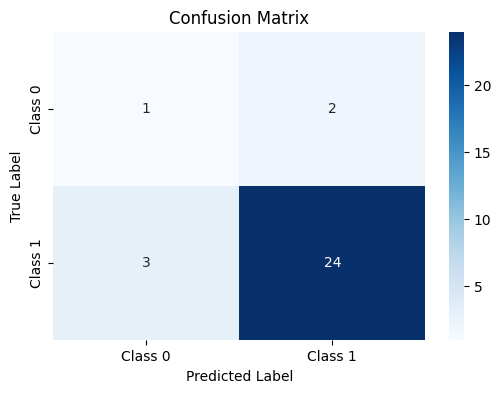

In [23]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The model correctly classified 1 instance as negative (class 0), but made 2 false positive misclassifications and 3 false negative misclassifications in the positive class (class 1). It correctly classified 24 instances as positive (class 1).

In [24]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Convert test_predictions to a numpy array
test_predictions = np.array(test_predictions)

# Compute classification report
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.92      0.89      0.91        27

    accuracy                           0.83        30
   macro avg       0.59      0.61      0.60        30
weighted avg       0.86      0.83      0.84        30



- La precisione rappresenta la percentuale di istanze classificate correttamente rispetto al totale delle istanze classificate in quella classe. Nella classe 0, la precisione è del 25%, il che significa che solo il 25% delle istanze classificate come classe 0 è effettivamente corretto. Nella classe 1, la precisione è del 92%, indicando che il 92% delle istanze classificate come classe 1 è corretto.
- La recall, rappresenta la percentuale di istanze positive correttamente identificate rispetto al totale delle istanze effettivamente positive. Nella classe 0, la recall è del 33%, indicando che solo il 33% delle istanze effettivamente appartenenti alla classe 0 è stato correttamente identificato. Nella classe 1, la recall è dell'89%, indicando che l'89% delle istanze effettivamente appartenenti alla classe 1 è stato correttamente identificato.
- L'F1-score rappresenta una misura bilanciata tra precisione e recall. È la media armonica delle due metriche. Nella classe 0, l'F1-score è del 29%, mentre nella classe 1 è del 91%.
- L'accuratezza rappresenta la percentuale di istanze correttamente classificate rispetto al totale delle istanze. L'accuratezza totale del modello è del 83%, indicando che l'83% delle istanze è stato classificato correttamente.
- La media aritmetica delle metriche per tutte le classi. L'F1-score medio tra le classi è del 60%.
- La media ponderata delle metriche, in cui i pesi sono determinati dal supporto di ciascuna classe. L'F1-score medio ponderato tra le classi è dell'84%.

AUC: 0.6111111111111112


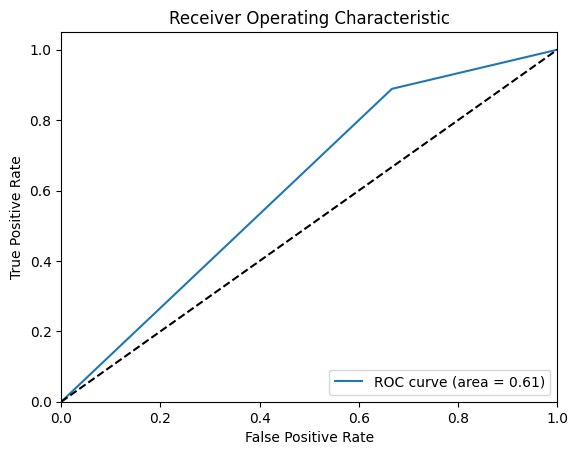

In [25]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc = roc_auc_score(test_labels, test_predictions)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- L'AUC rappresenta la misura dell'efficacia complessiva del modello nell'effettuare la classificazione. Un valore di AUC pari a 1 indica una classificazione perfetta, mentre un valore di AUC pari a 0.5 indica una classificazione casuale. In questo caso, l'AUC è superiore a 0.5, ma si tratta di un valore modesto.
- La ROC curve rappresenta la relazione tra il tasso di veri positivi (True Positive Rate) e il tasso di falsi positivi (False Positive Rate) al variare della soglia di classificazione. L'area sottesa dalla curva ROC è indicativa delle prestazioni del modello. In questa curva ROC, l'area è del 0.61, il che indica che il modello ha una capacità di classificazione modesta.

In [ ]:

# Esecuzione della cross-validation
scores = cross_val_score(decision_tree, train_features, train_labels, cv=5)

# Calcolo della media dei punteggi di accuratezza
mean_accuracy = scores.mean()

# Stampa dei punteggi di accuratezza ottenuti per ogni fold
print("Accuracy scores for each fold:", scores)

# Stampa del punteggio medio di accuratezza
print("Mean accuracy:", mean_accuracy)

# Random Forest

Random Forest is an ensemble technique that combines several decision trees to improve prediction accuracy and reduce overfitting.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Creating the Random Forest classifier

In [27]:
# Creating the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=200) #numero di alberi


Model training on the training base

In [28]:
# Model training on the training base
random_forest.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=200)


Test set predictions

In [29]:
# Predizioni sul set di test
test_predictions = random_forest.predict(test_features)
print(test_predictions)

[1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Metrics to evaluate the performance of the Random Forest

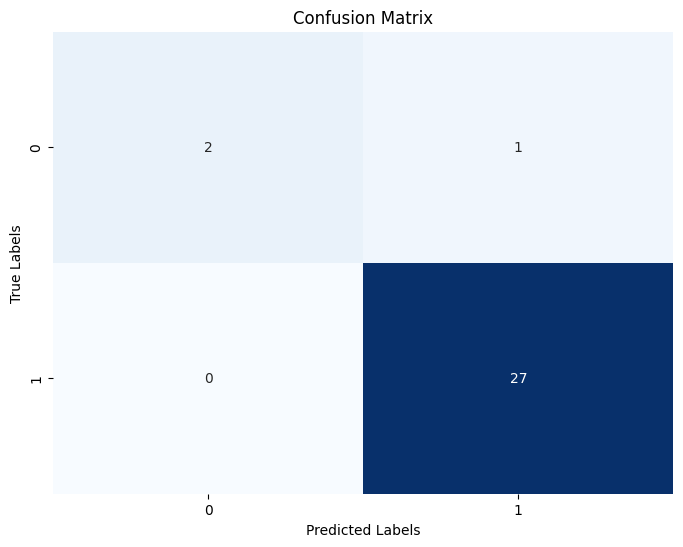

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The model correctly classified most instances of class 1 (27 true positives) and made only one error in classifying one instance of class 0 as class 1 (1 false positive). However, 2 false negatives were identified, i.e. instances of class 1 which were incorrectly classified as class 0.

In general, the confusion matrix output suggests that the model has good ability to detect the positive class (1) but could benefit from an improvement in its ability to detect the negative class (0).

In [31]:
# Valutazione dell'accuracy modello
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9666666666666667


l modello ha classificato correttamente il 96.67% delle istanze nel set di test. Un'accuracy così elevata indica una buona capacità del modello nel fare predizioni corrette.

In [32]:
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.96      1.00      0.98        27

    accuracy                           0.97        30
   macro avg       0.98      0.83      0.89        30
weighted avg       0.97      0.97      0.96        30



- Per la classe 0, si ha una precision del 100%, il che indica che tutte le istanze classificate come classe 0 sono effettivamente della classe 0. Il recall è del 67%, che indica che il 67% delle istanze di classe 0 è stato correttamente identificato dal modello. 

- L'f1-score, che combina precision e recall, è del 80%.

- Per la classe 1, si ha una precision del 96%, il che indica che il 96% delle istanze classificate come classe 1 sono effettivamente della classe 1. Il recall è del 100%, indicando che tutte le istanze di classe 1 sono state correttamente identificate dal modello. L'f1-score è del 98%.

- L'accuracy globale è del 97%, che corrisponde al 97% delle predizioni corrette sul totale delle istanze nel set di test.

- La media pesata delle metriche (weighted avg) tiene conto del numero di istanze per classe e fornisce una stima complessiva delle prestazioni del modello. In questo caso, si ottiene un f1-score del 96% per la media pesata delle classi.

Complessivamente, l'output indica che il modello random forest ha ottenuto una buona performance, con un'accuracy elevata e metriche di precision, recall e f1-score consistenti per entrambe le classi.

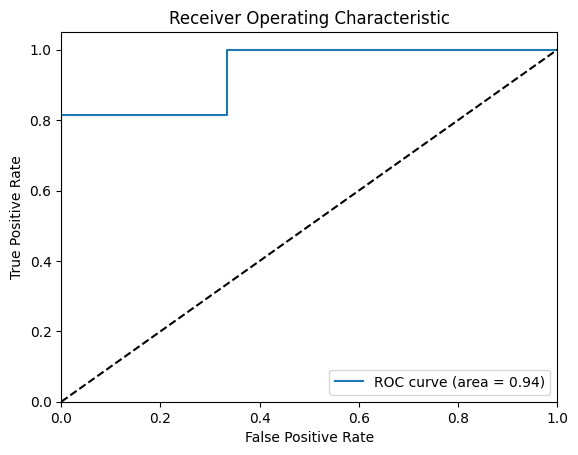

AUC: 0.9382716049382717


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for positive class
probs = random_forest.predict_proba(test_features)[:, 1]

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(test_labels, probs)

# Compute AUC
auc = roc_auc_score(test_labels, probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("AUC:", auc)


- L'AUC è pari a 0.938, il che indica una buona capacità del modello di distinguere correttamente tra le due classi.
- La curva ROC, rappresentata nel grafico, mostra la relazione tra il tasso di veri positivi (True Positive Rate, TPR) e il tasso di falsi positivi (False Positive Rate, FPR) al variare della soglia di classificazione. In questo caso, l'area sotto la curva ROC è di 0.94, indicando un'ottima capacità di classificazione del modello nella distinzione tra le due classi.

Accuracy scores for each fold: [0.85714286 0.85185185 0.77777778 0.96296296 0.81481481]
Mean accuracy: 0.8529100529100528


In [35]:
from sklearn.model_selection import cross_val_score
# Esecuzione della cross-validation
scores = cross_val_score(random_forest, train_features, train_labels, cv=5)

# Calcolo della media dei punteggi di accuratezza
mean_accuracy = scores.mean()

# Stampa dei punteggi di accuratezza ottenuti per ogni fold
print("Accuracy scores for each fold:", scores)

# Stampa del punteggio medio di accuratezza
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.92857143 0.96296296 0.92592593 0.96296296 0.77777778]
Mean accuracy: 0.9116402116402117
